In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()

## EWMA

In [2]:
pd.options.display.float_format = '{:.5f}'.format
df = pd.DataFrame()
df['t'] = np.arange(10)
for alpha in np.linspace(0, 1, 10):
    alpha = round(alpha, 2)
    df[f'alpha={alpha}'] = list(reversed([(1 - alpha)**i for i in range(10)]))
df    

,t,alpha=0.0,alpha=0.11,alpha=0.22,alpha=0.33,alpha=0.44,alpha=0.56,alpha=0.67,alpha=0.78,alpha=0.89,alpha=1.0
0,0,1.00000,0.35036,0.10687,0.02721,0.00542,0.00062,0.00005,0.00000,0.00000,0.00000
1,1,1.00000,0.39366,0.13701,0.04061,0.00967,0.00140,0.00014,0.00001,0.00000,0.00000
2,2,1.00000,0.44231,0.17566,0.06061,0.01727,0.00319,0.00043,0.00002,0.00000,0.00000
3,3,1.00000,0.49698,0.22520,0.09046,0.03084,0.00726,0.00129,0.00011,0.00000,0.00000
4,4,1.00000,0.55841,0.28872,0.13501,0.05507,0.01649,0.00391,0.00052,0.00002,0.00000
5,5,1.00000,0.62742,0.37015,0.20151,0.09834,0.03748,0.01186,0.00234,0.00015,0.00000
6,6,1.00000,0.70497,0.47455,0.30076,0.17562,0.08518,0.03594,0.01065,0.00133,0.00000
7,7,1.00000,0.79210,0.60840,0.44890,0.31360,0.19360,0.10890,0.04840,0.01210,0.00000
8,8,1.00000,0.89000,0.78000,0.67000,0.56000,0.44000,0.33000,0.22000,0.11000,0.00000
9,9,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [3]:
df = pd.DataFrame()
df['x'] = np.arange(10)
df['ewm(alpha=1)'] = df.x.ewm(alpha=1).mean()
df['ewm(alpha=0)'] = df.x.ewm(alpha=.0000001).mean()
df['ewm(alpha=.8)'] = df.x.ewm(alpha=.8).mean()
df['ewm(alpha=.5)'] = df.x.ewm(alpha=.5).mean()
df['ewm(alpha=.1)'] = df.x.ewm(alpha=.1).mean()
df

,x,ewm(alpha=1),ewm(alpha=0),ewm(alpha=.8),ewm(alpha=.5),ewm(alpha=.1)
0,0,0.00000,0.00000,0.00000,0.00000,0.00000
1,1,1.00000,0.50000,0.83333,0.66667,0.52632
2,2,2.00000,1.00000,1.77419,1.42857,1.07011
3,3,3.00000,1.50000,2.75641,2.26667,1.63129
4,4,4.00000,2.00000,3.75160,3.16129,2.20971
5,5,5.00000,2.50000,4.75038,4.09524,2.80522
6,6,6.00000,3.00000,5.75009,5.05512,3.41759
7,7,7.00000,3.50000,6.75002,6.03137,4.04660
8,8,8.00000,4.00000,7.75000,7.01761,4.69197
9,9,9.00000,4.50000,8.75000,8.00978,5.35340


## Bollinger Bands

In [4]:
# Data + Prep from TS: explore lesson
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

# T(°F) = T(K) × 9/5 - 459.67
def to_fahrenheit(k):
    return k * 9/5 - 459.67

url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
s = pd.read_csv(url, index_col='datetime', parse_dates=True).temp
s = s.dropna()
s = to_fahrenheit(s)
s = s.resample('D').mean()

In [5]:
s

datetime
2012-10-01   61.33094
2012-10-02   65.67882
2012-10-03   67.41125
2012-10-04   67.70375
2012-10-05   77.07312
               ...   
2017-11-26   65.74475
2017-11-27   62.47475
2017-11-28   63.80277
2017-11-29   64.58000
2017-11-30   65.96600
Freq: D, Name: temp, Length: 1887, dtype: float64

Text(0.5, 0, '')

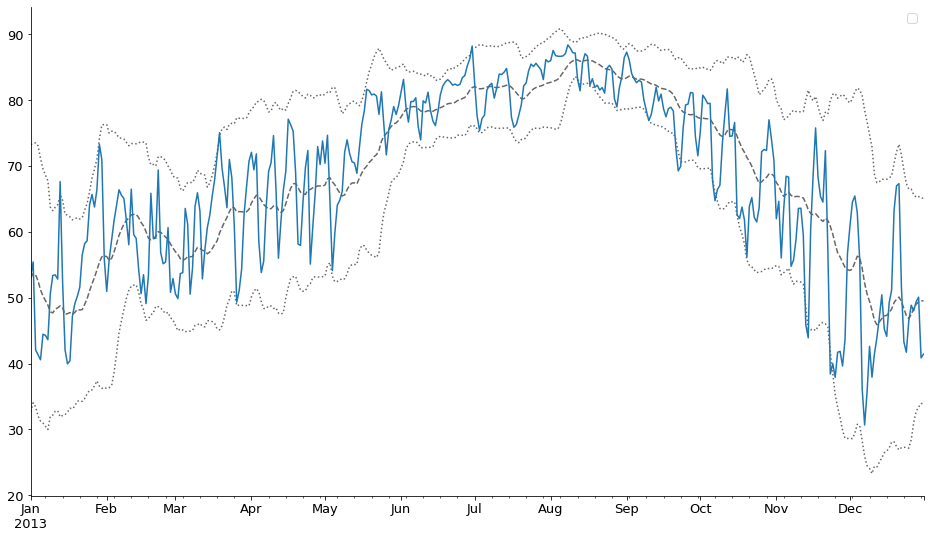

In [10]:
K = 2
N = 20
#N is the period
std = s.rolling(N).std()
bands = pd.DataFrame()
bands['mid'] = s.rolling(N).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 9))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.legend('')
plt.xlabel('')

Text(0.5, 0, '')

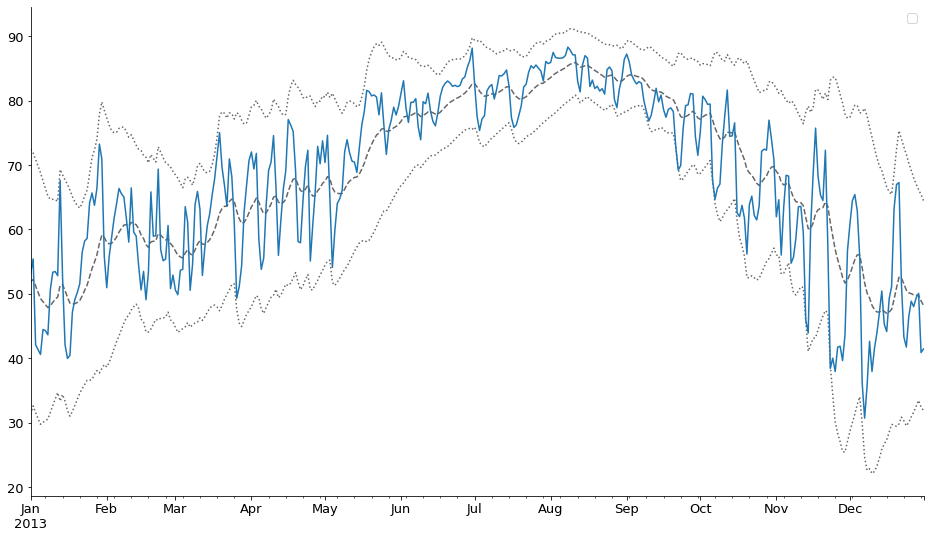

In [14]:
K = 2
N = 20
#N is the period
std = s.ewm(alpha=.1).std()
bands = pd.DataFrame()
bands['mid'] = s.ewm(alpha=.1).mean()
bands['upper'] = bands['mid'] + K * std
bands['lower'] = bands['mid'] - K * std
bands['actual'] = s

t = bands.loc['2013']
t[['upper', 'lower']].plot(color='black', alpha=.6, ls=':', figsize=(16, 9))
t.mid.plot(color='black', alpha=.6, ls='--')
t.actual.plot()
plt.legend('')
plt.xlabel('')

In [15]:
bands['%b'] = (bands.actual - bands.lower) / (bands.upper - bands.lower)

In [16]:
bands

,mid,upper,lower,actual,%b
datetime,,,,,
2012-10-01,61.33094,NaN,NaN,61.33094,NaN
2012-10-02,63.61930,69.76813,57.47047,65.67882,0.66747
2012-10-03,65.01854,71.18874,58.84834,67.41125,0.69389
2012-10-04,65.79935,71.45533,60.14337,67.70375,0.66835
2012-10-05,68.55234,80.41097,56.69372,77.07312,0.85927
...,...,...,...,...,...
2017-11-26,63.12138,79.44846,46.79430,65.74475,0.58034
2017-11-27,63.05672,78.55107,47.56236,62.47475,0.48122
2017-11-28,63.13132,77.83775,48.42489,63.80277,0.52283


In [17]:
bands[bands['%b'] > 1]

,mid,upper,lower,actual,%b
datetime,,,,,
2016-07-19,85.87917,91.41308,80.34525,91.55840,1.01313


In [19]:
upper_outliers = bands[bands['%b'] > 1]

In [20]:
lower_outliers = bands[bands['%b'] < 0]

No handles with labels found to put in legend.


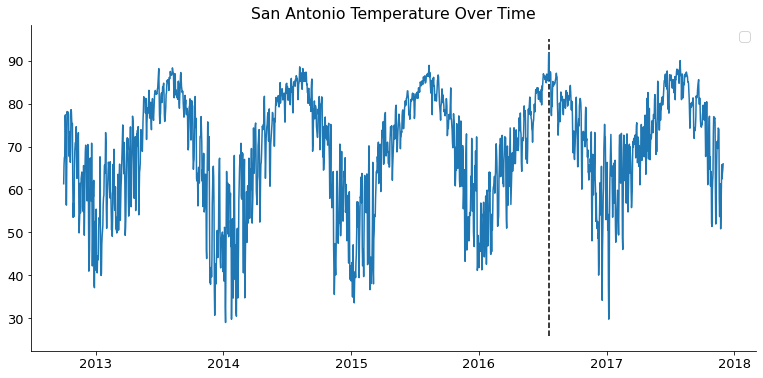

In [22]:
#make vertical lines with the plt.vlines
plt.plot(bands.index, bands.actual)
plt.vlines(upper_outliers.index, *plt.ylim(), color='black', ls='--')
plt.title('San Antonio Temperature Over Time')
plt.legend()

In [18]:
bands[bands['%b'] < 0]

,mid,upper,lower,actual,%b
datetime,,,,,
2012-10-28,70.23731,86.85000,53.62462,53.50700,-0.00354
2012-12-12,60.63724,79.36185,41.91262,40.96775,-0.02523
2013-09-22,78.39345,87.30626,69.48063,69.22009,-0.01462
2013-11-23,61.07134,83.17157,38.97111,38.41475,-0.01259
2014-01-24,50.38818,70.69194,30.08442,29.76537,-0.00786
2014-09-13,81.28492,91.32744,71.24239,68.91084,-0.11608
2014-11-01,70.92164,82.42228,59.42101,57.95776,-0.06362
2015-08-21,84.36858,90.58387,78.15329,77.42300,-0.05875
2015-10-03,79.19068,85.40998,72.97137,72.54668,-0.03414
